# Perceptron for Regression

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [6]:
filepath = "/Users/rajeshr/Desktop/Assignment1/Group22/Regression/UnivariateData/22.csv"
data = pd.read_csv(filepath, header=None, delimiter=",")
data

,0,1
0,0.621,0.120370
1,0.649,0.070733
2,0.951,0.774750
3,0.259,0.389780
4,0.481,0.032068
...,...,...
996,0.684,0.144630
997,0.770,0.403200
998,0.731,0.259940
999,0.961,0.823680


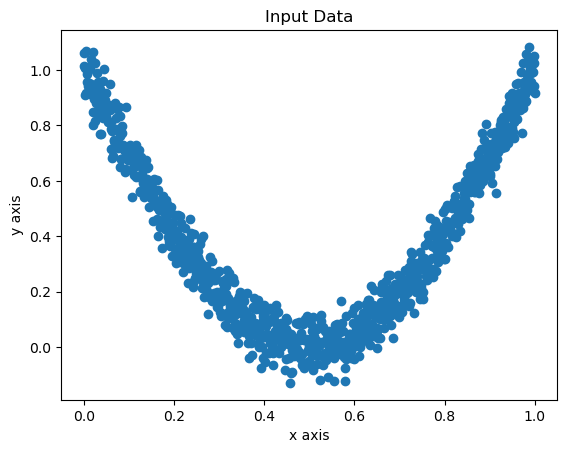

In [16]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.title("Input Data")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

In [39]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [40]:
training, validation, test = split_data(data)
training

,0,1
0,0.621,0.120370
1,0.649,0.070733
2,0.951,0.774750
3,0.259,0.389780
4,0.481,0.032068
...,...,...
595,0.474,0.084088
596,0.125,0.564840
597,0.166,0.496640
598,0.465,-0.032108


In [10]:
training.iat[1,0]

0.649

# Training

In [32]:
np.random.seed(0)

def train_data(xn):
    w = np.random.randn(2)
    epoch = 100
    print(w)
    avg_err = []
    mse = []
    
    while(epoch):
        err = []
        for i in range(len(xn)):
            
            xi = xn.iat[i, 0]
            yn = xn.iat[i, 1]
            
            sn = np.dot(w.T, [1, xi])
            
            error = 0.5*(yn-sn)**2
            err.append(error)

            eta = 0.001
            w = w + eta*(yn-sn)*xi

        avg_error = sum(err)/(2*len(err))
        avg_err.append(avg_error)
        epoch -= 1
        mse.append(np.sqrt(sum(err)/len(err)))
    
    print(avg_error, w)
    return w, avg_err, mse
    
w, avg_err, mse = train_data(training)

[1.76405235 0.40015721]
0.034682287706864504 [ 0.76148987 -0.60240526]


# Testing

In [38]:
def testdata(xn, w):
    
    y = []
    for i in range(len(xn)):
        y.append(np.dot(w.T, [1, xn.iat[i, 0]]))
    
    return y

y = testdata(validation, w)

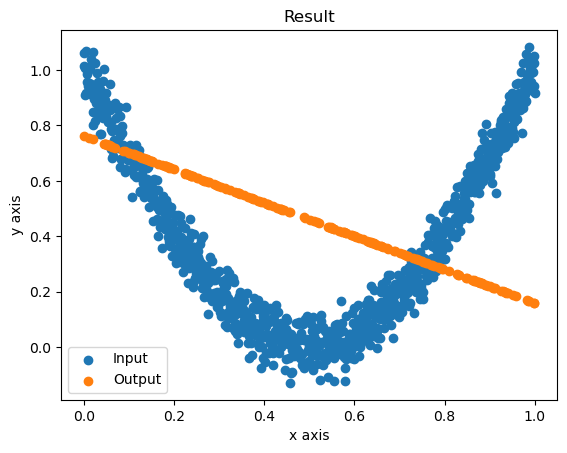

In [17]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.scatter(validation.iloc[:,0], y)
plt.title("Result")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

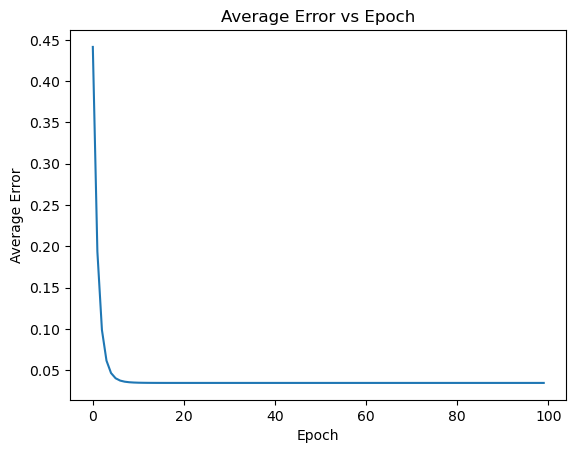

In [45]:
plt.plot(avg_err)
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.savefig("/Users/rajeshr/Desktop/errorvsepoch.png")
plt.show()

[-0.88778575 -1.98079647]
0.03005250778679987 [ 0.65349447 -0.43951625]
[-0.34791215  0.15634897]
0.03135612564881395 [0.01694295 0.52120407]
[1.23029068 1.20237985]
0.02558231814193232 [0.23827437 0.21036354]


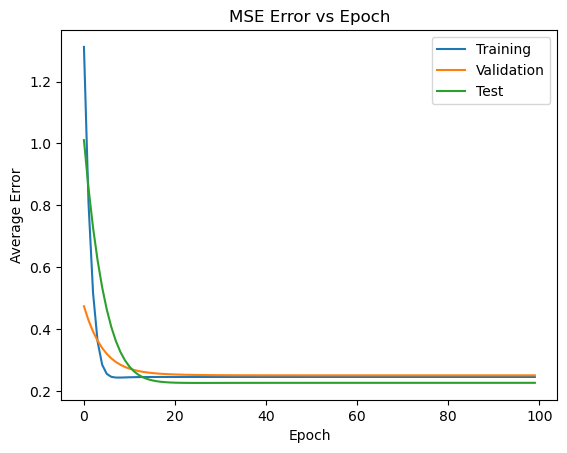

In [44]:
wtr, avg_errtr, msetr = train_data(training)
wv, avg_errv, msev = train_data(validation)
wt, avg_errt, mset = train_data(test)

plt.plot(msetr)
plt.plot(msev)
plt.plot(mset)

plt.title("MSE Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.legend(["Training", "Validation", "Test"])
plt.savefig("/Users/rajeshr/Desktop/msevsepoch.png")
plt.show()

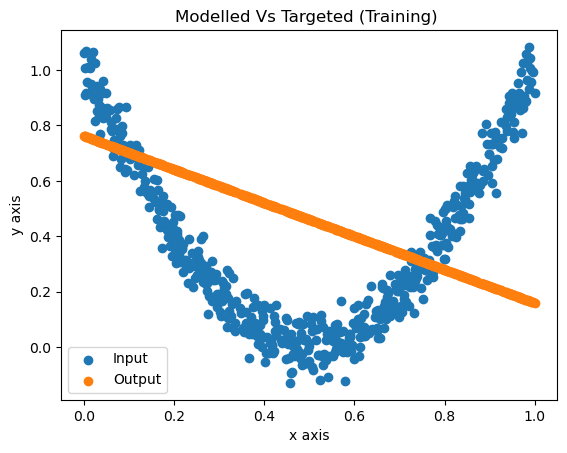

In [50]:
y = testdata(training, w)
plt.scatter(training.iloc[:,0], training.iloc[:,1])
plt.scatter(training.iloc[:,0], y)
plt.title("Modelled Vs Targeted (Training) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

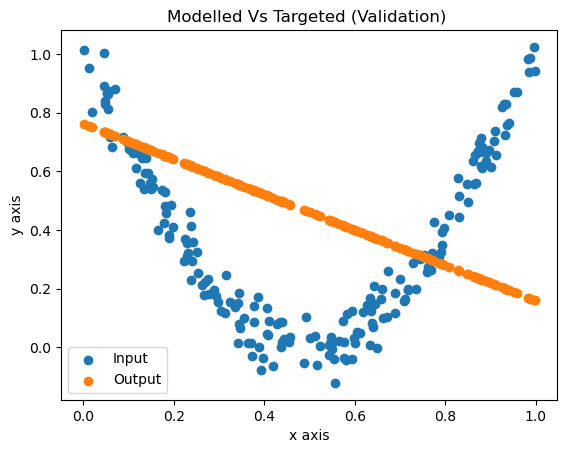

In [51]:
y = testdata(validation, w)
plt.scatter(validation.iloc[:,0], validation.iloc[:,1])
plt.scatter(validation.iloc[:,0], y)
plt.title("Modelled Vs Targeted (Validation) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

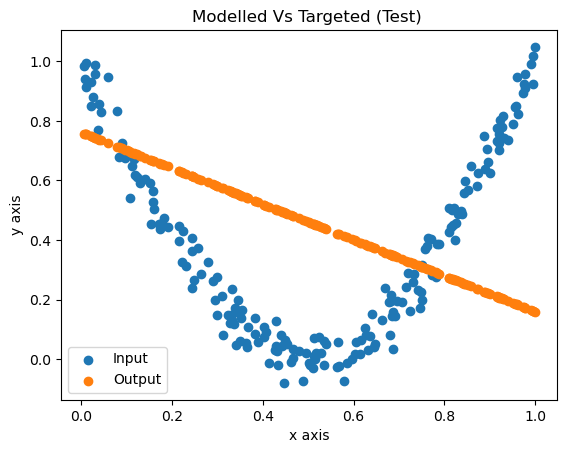

In [52]:
y = testdata(test, w)
plt.scatter(test.iloc[:,0], test.iloc[:,1])
plt.scatter(test.iloc[:,0], y)
plt.title("Modelled Vs Targeted (Test) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

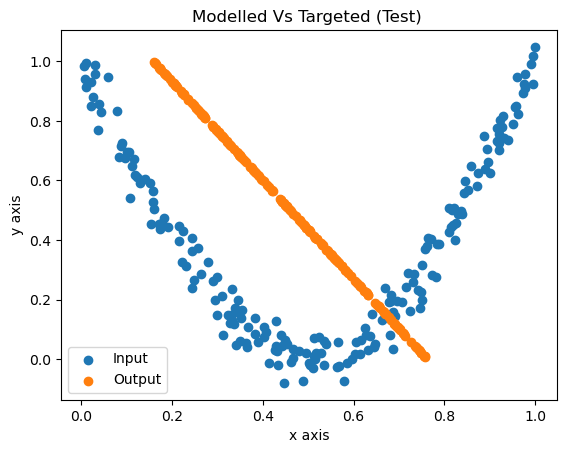

In [53]:
y = testdata(test, w)
plt.scatter(test.iloc[:,0], test.iloc[:,1])
plt.scatter(y, test.iloc[:,0])
plt.title("Modelled Vs Targeted (Test) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()